In [38]:
import math
import time
import numpy as np
import torch

In [39]:
n = 10000
a =torch.ones(n)
b = torch.ones(n)


In [40]:
%%time
c= torch.zeros(n)

for i in range(n):
    c[i] = a[i] + b[i]

Wall time: 79.8 ms


In [41]:
%%time 
d = torch.zeros(n)

d = a + b

Wall time: 0 ns


In [42]:
c == d

tensor([True, True, True,  ..., True, True, True])

In [43]:
# normal equation function

def normal_me(x, mu, sigma):
    p = 1/ math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp((-0.5 / sigma **2)* (x-mu)**2 )

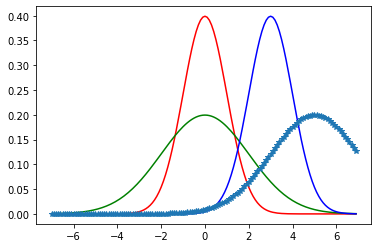

In [44]:
import matplotlib.pyplot as plt

x = np.arange(-7,7, 0.1)

# mean and standard deviation pairs

params = [(0,1, 'r'), (0,2, 'g'), (3, 1, 'b'), (5,2, '*')]

for i, (mu, sigma, color) in enumerate(params):
    plt.plot(x, normal_me(x, mu, sigma), color)

plt.show()


### Exercises

1. Assume that we have some data ∑x1, . . . , xn ∈ R. Our goal is to find a constant b such that (xi − b)2 is minimized.

    1. Find a analytic solution for the optimal value of b.

    xi = b

    2. How does this problem and its solution relate to the normal distribution?
    
    dont know


2. Derive the analytic solution to the optimization problem for linear regression with squared error. To keep things simple, you can omit the bias b from the problem (we can do this in principled fashion by adding one column to X consisting of all ones).

    1. Write out the optimization problem in matrix and vector notation (treat all the data asa single matrix, and all the target values as a single vector).
    
    dont know
    
    
    2. Compute the gradient of the loss with respect to w.
    
    dint know
    
    
    3. Find the analytic solution by setting the gradient equal to zero and solving the matrixnequation. 
    
    dont know
    
    4. When might this be better than using stochastic gradient descent? When might this method break?
    
    
    
3. Assume that the noise model governing the additive noise ϵ is the exponential distribution.That is, p(ϵ) = 12exp(−|ϵ|).
    
    1. Write out the negative log-likelihood of the data under the model − log P(y | X).
    
    dont know
    2. Can you find a closed form solution?
    
    dont know
    3. Suggest a stochastic gradient descent algorithm to solve this problem. What could possibly go wrong (hint: what happens near the stationary point as we keep on updating the parameters)? Can you fix this?
    dont know
    


In [45]:
X = torch.tensor([[2,3], [4,5]], dtype=torch.float32)
print(X.shape)
y = torch.tensor([0,1], dtype=torch.float32)
w = torch.normal(0,1,(X.shape[0],1), requires_grad=True, dtype=torch.float32)

loss = (y - torch.matmul(X,w))**2

torch.Size([2, 2])


In [46]:
w

tensor([[-1.9221],
        [ 0.9618]], requires_grad=True)

In [47]:
loss

tensor([[ 0.9193,  3.8368],
        [ 8.2906, 15.0493]], grad_fn=<PowBackward0>)

In [48]:
loss.sum().backward()

In [49]:
w.grad

tensor([[-65.7397],
        [-85.0922]])

In [50]:
# the analytic solution
w_a = torch.matmul(X.T, X) ** -1  

In [51]:
w_a

tensor([[0.0500, 0.0385],
        [0.0385, 0.0294]])

In [52]:
X.shape, y.shape

(torch.Size([2, 2]), torch.Size([2]))

In [53]:
w_a = torch.matmul(w_a, torch.matmul(X.T, y))

In [54]:
w_a

tensor([0.3923, 0.3009])